#Intilization

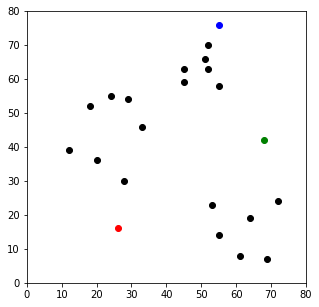

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

df = pd.DataFrame({
    'x' : [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72 ],
    'y' : [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(200)
k=3
#Centroid[i]= [x,y]
centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

##Assignment stage

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        19.104973        63.063460        45.880279        1     r
1  20  36        11.661904        57.688820        39.824616        1     r
2  28  30         4.472136        55.172457        36.796739        1     r
3  18  52        27.202941        52.497619        37.121422        1     r
4  29  54        28.160256        41.436699        26.019224        3     b


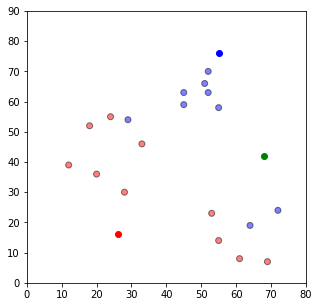

In [29]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
         np.sqrt(
             (df['x']-centroids[i][0]) ** 2
             + (df['y']-centroids[i][0]) ** 2
         )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 90)
plt.show()

#Update stage

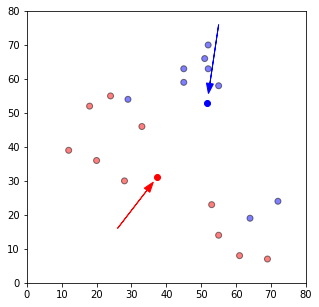

In [30]:
    import copy
    old_centroids = copy.deepcopy(centroids)

    def update(k):
        for i in centroids.keys():
            centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
            centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
        return k
    centroids = update(centroids)
    fig = plt.figure(figsize=(5,5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
    plt.show()

#Repeat Assignment stage

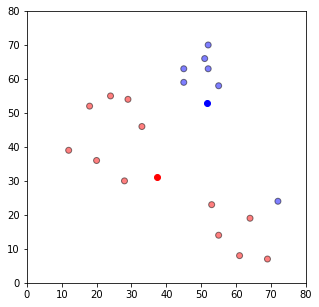

In [31]:
df = assignment(df, centroids)
#plot of  result
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

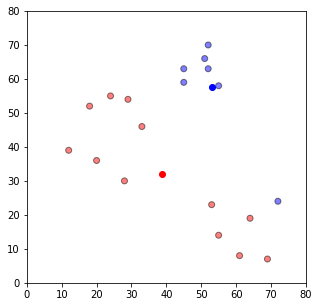

In [32]:
#continue untill all asigned categories dont change anymore
while True:
    closest_centroids = df['closest'].copy(deep = True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
         break

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [33]:
df = pd.DataFrame({
    'x' : [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72 ],
    'y' : [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

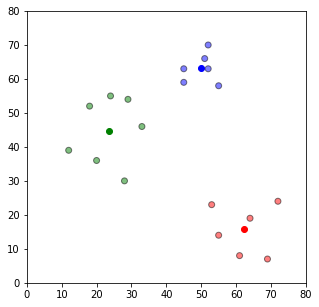

In [35]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolors='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()